随机森林时非常具有代表性的Bagging(装袋) 集成算法(Ensemble),他它的所有基评估器都是决策树.分类树组成的森林就叫做随机森林分类器,回归树所集成的森林就叫做随机森林回归器

In [11]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [6]:
wine = load_wine()

In [7]:
wine

{'data': array([[  1.42300000e+01,   1.71000000e+00,   2.43000000e+00, ...,
           1.04000000e+00,   3.92000000e+00,   1.06500000e+03],
        [  1.32000000e+01,   1.78000000e+00,   2.14000000e+00, ...,
           1.05000000e+00,   3.40000000e+00,   1.05000000e+03],
        [  1.31600000e+01,   2.36000000e+00,   2.67000000e+00, ...,
           1.03000000e+00,   3.17000000e+00,   1.18500000e+03],
        ..., 
        [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
           5.90000000e-01,   1.56000000e+00,   8.35000000e+02],
        [  1.31700000e+01,   2.59000000e+00,   2.37000000e+00, ...,
           6.00000000e-01,   1.62000000e+00,   8.40000000e+02],
        [  1.41300000e+01,   4.10000000e+00,   2.74000000e+00, ...,
           6.10000000e-01,   1.60000000e+00,   5.60000000e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 

In [8]:
wine.data.shape

(178, 13)

In [9]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target,test_size=0.3)

In [44]:
#决策树是自带随机性的,因为有很多的特征,所以需要规定random_state来固定结果
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
#随机森林的random_state是森林是固定的,但是里面每一棵树都是不一样的.
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(X_train,y_train)
rfc = rfc.fit(X_train,y_train)

score_c = clf.score(X_test,y_test)
score_r = rfc.score(X_test,y_test)

In [34]:
print("Single Tree:{}".format(score_c),"Random Forest:{}".format(score_r))

Single Tree:0.9629629629629629 Random Forest:1.0


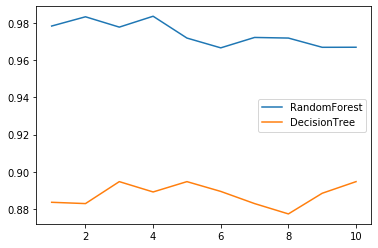

In [37]:
#10组交叉验证,每次进行10次交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc_s = []
clf_s = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s.append(cross_val_score(rfc,wine.data,wine.target,cv=10).mean())

    clf = DecisionTreeClassifier()
    clf_s.append(cross_val_score(clf,wine.data,wine.target,cv=10).mean())

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "DecisionTree")
plt.legend()
plt.show()

0.983625730994 7


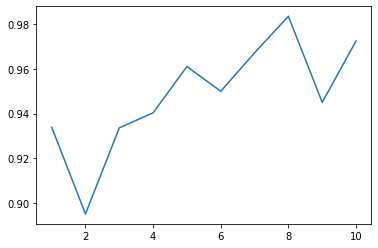

In [40]:
#n_estimators学习曲线
superpa = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure
plt.plot(range(1,11),superpa)
plt.show()

In [45]:
rfc.feature_importances_

array([ 0.08850628,  0.05240382,  0.01992507,  0.08229525,  0.02597748,
        0.05408211,  0.21575577,  0.01212168,  0.00273013,  0.16459346,
        0.02430905,  0.06379945,  0.19350048])

In [48]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=209652396, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=398764591, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weig

In [70]:
print([*zip(rfc.predict_proba(X_test[0:,:]),rfc.predict(X_test))])

[(array([ 1.,  0.,  0.]), 0), (array([ 1.,  0.,  0.]), 0), (array([ 0.9,  0.1,  0. ]), 0), (array([ 0.9,  0.1,  0. ]), 0), (array([ 0.,  1.,  0.]), 1), (array([ 0.,  0.,  1.]), 2), (array([ 0.,  1.,  0.]), 1), (array([ 0.1,  0.9,  0. ]), 1), (array([ 1.,  0.,  0.]), 0), (array([ 1.,  0.,  0.]), 0), (array([ 1.,  0.,  0.]), 0), (array([ 0.1,  0.9,  0. ]), 1), (array([ 0.,  1.,  0.]), 1), (array([ 0.1,  0.8,  0.1]), 1), (array([ 0.,  1.,  0.]), 1), (array([ 1.,  0.,  0.]), 0), (array([ 1.,  0.,  0.]), 0), (array([ 0.,  0.,  1.]), 2), (array([ 0. ,  0.8,  0.2]), 1), (array([ 0.,  0.,  1.]), 2), (array([ 1.,  0.,  0.]), 0), (array([ 0.,  1.,  0.]), 1), (array([ 0.,  1.,  0.]), 1), (array([ 0.6,  0.4,  0. ]), 0), (array([ 0.,  1.,  0.]), 1), (array([ 0. ,  0.6,  0.4]), 1), (array([ 1.,  0.,  0.]), 0), (array([ 0. ,  0.3,  0.7]), 2), (array([ 0. ,  0.9,  0.1]), 1), (array([ 0.,  1.,  0.]), 1), (array([ 0.,  1.,  0.]), 1), (array([ 0. ,  0.9,  0.1]), 1), (array([ 0.1,  0.2,  0.7]), 2), (array